# Project: Investigate European Soccer Teams

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This report will be analizing data from European soccer matches.  In particular it will be identifying trends around these questions -  What teams improved the most over the time period? Which players had the most penalties? 

In [8]:
#import statements and envrionment setup. 
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
cnx = sqlite3.connect('database.sqlite')

<a id='wrangling'></a>
## Data Wrangling

In the following section of this report the focus will be to obtain the data from the database and begin to organize it so we can eventually answer the questions

### General Properties

In [113]:
# Load the soccer data.

#load player attributes table
df_playah_att = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

#load player table
df_playah = pd.read_sql_query("SELECT * FROM Player", cnx)

#load team table
df_team = pd.read_sql_query("SELECT * FROM Team", cnx)

#load team attributes table
df_team_att = pd.read_sql_query("SELECT * FROM Team_Attributes", cnx)

#load match table
df_match = pd.read_sql_query("SELECT * FROM Match", cnx)

df_team_att.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


Check the shape and description of the tables

In [47]:
#player_attribute
print("player_attribute shape =", df_playah_att.shape)
df_playah_att.describe()

player_attribute shape = (183978, 42)


,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


In [48]:
#Team
print("team shape =", df_team.shape)
df_team.describe()

team shape = (299, 5)


,id,team_api_id,team_fifa_api_id
count,299.000000,299.000000,288.000000
mean,23735.301003,12340.521739,21534.305556
std,15167.914719,25940.411135,42456.439408
min,1.000000,1601.000000,1.000000
25%,9552.500000,8349.000000,178.750000
50%,22805.000000,8655.000000,673.500000
75%,36250.500000,9886.500000,1910.750000
max,51606.000000,274581.000000,112513.000000


In [49]:
#team_attribute
print("team_attribute shape =", df_team_att.shape)
df_team_att.describe()

team_attribute shape = (1458, 25)


,id,team_fifa_api_id,team_api_id,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
count,1458.000000,1458.000000,1458.000000,1458.000000,489.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,729.500000,17706.982167,9995.727023,52.462277,48.607362,48.490398,52.165295,53.731824,53.969136,46.017147,49.251029,52.185871
std,421.032659,39179.857739,13264.869900,11.545869,9.678290,10.896101,10.360793,11.086796,10.327566,10.227225,9.738028,9.574712
min,1.000000,1.000000,1601.000000,20.000000,24.000000,20.000000,21.000000,20.000000,22.000000,23.000000,24.000000,29.000000
25%,365.250000,110.000000,8457.750000,45.000000,42.000000,40.000000,46.000000,47.000000,48.000000,39.000000,44.000000,47.000000
50%,729.500000,485.000000,8674.000000,52.000000,49.000000,50.000000,52.000000,53.000000,53.000000,45.000000,48.000000,52.000000
75%,1093.750000,1900.000000,9904.000000,62.000000,55.000000,55.000000,59.000000,62.000000,61.000000,51.000000,55.000000,58.000000
max,1458.000000,112513.000000,274581.000000,80.000000,77.000000,80.000000,80.000000,80.000000,80.000000,72.000000,72.000000,73.000000


In [50]:
#match
print("Match shape =", df_match.shape)
df_match.describe()

Match shape = (25979, 115)


,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
count,25979.000000,25979.000000,25979.000000,25979.000000,2.597900e+04,25979.000000,25979.000000,25979.000000,25979.000000,24158.000000,...,17097.000000,22568.000000,22568.000000,22568.000000,14162.000000,14162.000000,14162.000000,14161.000000,14161.000000,14161.000000
mean,12990.000000,11738.630317,11738.630317,18.242773,1.195429e+06,9984.371993,9984.475115,1.544594,1.160938,0.999586,...,4.622343,2.668107,3.899048,4.840281,2.498764,3.648189,4.353097,2.497894,3.660742,4.405663
std,7499.635658,7553.936759,7553.936759,10.407354,4.946279e+05,14087.453758,14087.445135,1.297158,1.142110,0.022284,...,3.632164,1.928753,1.248221,4.318338,1.489299,0.867440,3.010189,1.507793,0.868272,3.189814
min,1.000000,1.000000,1.000000,1.000000,4.831290e+05,1601.000000,1601.000000,0.000000,0.000000,0.000000,...,1.100000,1.030000,1.620000,1.080000,1.050000,1.450000,1.120000,1.040000,1.330000,1.120000
25%,6495.500000,4769.000000,4769.000000,9.000000,7.684365e+05,8475.000000,8475.000000,1.000000,0.000000,1.000000,...,2.500000,1.700000,3.300000,2.550000,1.670000,3.200000,2.500000,1.670000,3.250000,2.500000
50%,12990.000000,10257.000000,10257.000000,18.000000,1.147511e+06,8697.000000,8697.000000,1.000000,1.000000,1.000000,...,3.500000,2.150000,3.500000,3.500000,2.100000,3.300000,3.400000,2.100000,3.400000,3.400000
75%,19484.500000,17642.000000,17642.000000,27.000000,1.709852e+06,9925.000000,9925.000000,2.000000,2.000000,1.000000,...,5.250000,2.800000,4.000000,5.400000,2.650000,3.750000,5.000000,2.620000,3.750000,5.000000
max,25979.000000,24558.000000,24558.000000,38.000000,2.216672e+06,274581.000000,274581.000000,10.000000,9.000000,2.000000,...,41.000000,36.000000,26.000000,67.000000,21.000000,11.000000,34.000000,17.000000,13.000000,34.000000


Check for missing data in specific columns that may be used to answer the questions

In [43]:
#check that all the players have penalty data
temp= pd.isnull(df_playah_attributes["penalties"])
print("players with missing penalty values:" , df_playah_attributes[temp].shape[0])

players with missing penalty values: 836


In [25]:
#Check the team data
df_team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


In [56]:
#check the team attribute data
df_team_att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

0        NaN
1       48.0
2       41.0
3        NaN
4        NaN
        ... 
1453     NaN
1454     NaN
1455     NaN
1456    42.0
1457    42.0
Name: buildUpPlayDribbling, Length: 1458, dtype: float64

In [42]:
# check the match data
df_match.info()

# need to know if there are any missing values for goals for and goals against as we need to know who won the match
homeGoal= pd.isnull(df_match["home_team_goal"])
print("home nulls:" , df_match[homeGoal].shape[0])
awayGoal= pd.isnull(df_match["away_team_goal"])
print("away nulls:" , df_match[awayGoal].shape[0])



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB
home nulls: 0
away nulls: 0



### Data Cleaning - replace null values and drop unecessary columns
I think the null values in the player_attributes tables for penalties should just be zero, this will help me figure out which players had the most penalties. 
Also, the null values in the team_attributes for column buildUpPlayDribbling might cause some problems so I am going to set those to the mean value. 
Drop the columns we wont be using from the match table.

Fix the players penalty nulls to be zeros

In [54]:
df_playah_attributes["penalties"].fillna(0, inplace=True)
temp= pd.isnull(df_playah_attributes["penalties"])
print("players with missing penalty values:" , df_playah_attributes[temp].shape[0])

players with missing penalty values: 0


Fix the buildUpPlayDribbling values to be the mean

In [59]:
df_team_att["buildUpPlayDribbling"].fillna(df_team_att["buildUpPlayDribbling"].mean(), inplace=True)
temp1= pd.isnull(df_team_att["buildUpPlayDribbling"])
print("buildUpPlayDribbling with missing values:" , df_team_att[temp1].shape[0])

buildUpPlayDribbling with missing values: 0


Now fix the match dataframe and drop some columns so we can make easier interpretations later.

In [102]:
#create a new match dataframe without all the betting junk
data = [df_match["id"], df_match["country_id"], df_match["league_id"], df_match["date"],df_match["home_team_api_id"],
        df_match["away_team_api_id"],df_match["home_team_goal"],df_match["away_team_goal"]]

headers = ["id", "country_id", "league_id", "date", "home_team_api_id","away_team_api_id","home_team_goal", "away_team_goal"]

df_match_fix = pd.concat(data, axis=1, keys=headers)
df_match_fix.head()

,id,country_id,league_id,date,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008-08-17 00:00:00,9987,9993,1,1
1,2,1,1,2008-08-16 00:00:00,10000,9994,0,0
2,3,1,1,2008-08-16 00:00:00,9984,8635,0,3
3,4,1,1,2008-08-17 00:00:00,9991,9998,5,0
4,5,1,1,2008-08-16 00:00:00,7947,9985,1,3


In [103]:
#Add a column to the match that shows which team won the match
df_match_fix['result'] = np.where((df_match_fix["home_team_goal"]).astype(int) - (df_match_fix["away_team_goal"]).astype(int) == 0, 'tie', 
                                 np.where((df_match_fix["home_team_goal"]).astype(int) - (df_match_fix["away_team_goal"]).astype(int) > 0, 'home', 'away'))
df_match_fix.head()



,id,country_id,league_id,date,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,result
0,1,1,1,2008-08-17 00:00:00,9987,9993,1,1,tie
1,2,1,1,2008-08-16 00:00:00,10000,9994,0,0,tie
2,3,1,1,2008-08-16 00:00:00,9984,8635,0,3,away
3,4,1,1,2008-08-17 00:00:00,9991,9998,5,0,home
4,5,1,1,2008-08-16 00:00:00,7947,9985,1,3,away


In [106]:
#drop all the ties, cuz who cares about ties
df_match_fix = df_match_fix[df_match_fix.result != 'tie']

#Add a column with winner id
df_match_fix['winning_team_id'] = np.where(df_match_fix['result'] == 'away', df_match_fix['away_team_api_id'], df_match_fix['home_team_api_id'])

df_match_fix.head()

,id,country_id,league_id,date,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,result,result_team_id,winning_team_id
2,3,1,1,2008-08-16 00:00:00,9984,8635,0,3,away,8635,8635
3,4,1,1,2008-08-17 00:00:00,9991,9998,5,0,home,9991,9991
4,5,1,1,2008-08-16 00:00:00,7947,9985,1,3,away,9985,9985
7,8,1,1,2008-08-16 00:00:00,4049,9996,1,2,away,9996,9996
8,9,1,1,2008-08-16 00:00:00,10001,9986,1,0,home,10001,10001


<a id='eda'></a>
## Exploratory Data Analysis

In this section the report will be focusing on computing the data needed to answer the questions. 


### Research Question 1 Which player has the most penalties

In [109]:
# find out the max number of penalties
df_playah_att['penalties'].max()

96.0

In [120]:
player_id_array = df_playah_att.loc[df_playah_att['penalties'] >= 96.0]
player_id_array

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
149591,149592,13879,39225,2016-03-10 00:00:00,75.0,75.0,right,high,medium,67.0,...,77.0,96.0,30.0,26.0,19.0,13.0,15.0,7.0,16.0,11.0
149592,149593,13879,39225,2015-12-24 00:00:00,75.0,75.0,right,high,medium,67.0,...,77.0,96.0,30.0,26.0,19.0,13.0,15.0,7.0,16.0,11.0
149593,149594,13879,39225,2015-10-23 00:00:00,75.0,75.0,right,high,medium,67.0,...,77.0,96.0,30.0,26.0,19.0,13.0,15.0,7.0,16.0,11.0
149594,149595,13879,39225,2015-09-21 00:00:00,75.0,75.0,right,high,medium,67.0,...,77.0,96.0,30.0,26.0,19.0,13.0,15.0,7.0,16.0,11.0


In [117]:
#find which players had that number
player_id_array = df_playah_att.loc[df_playah_att['penalties'] >= 96.0]["player_api_id"]
player_id_array 

149591    39225
149592    39225
149593    39225
149594    39225
Name: player_api_id, dtype: int64

In [118]:
#its all the same player, which player is it?
df_playah.loc[df_playah['player_api_id'].isin(player_id_array)]

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
8967,8981,39225,Rickie Lambert,13879,1982-02-16 00:00:00,187.96,170


Seriously Rickie, stop tripping dudes. How much worse are you than everyone else?

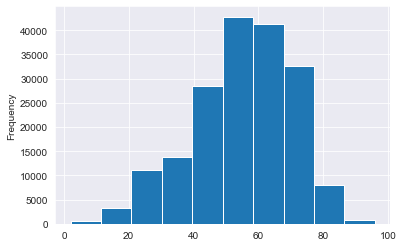

In [121]:
df_playah_att['penalties'].plot(kind='hist');

In [154]:
player_id_array2 = df_playah_att.loc[df_playah_att['penalties'] >= 90.0]["player_api_id"]
player_id_array2 
df_playah.loc[df_playah['player_api_id'].isin(player_id_array2)]

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
173,174,39311,Adrian Mutu,184410,1979-08-01 00:00:00,182.88,168
292,293,30881,Alberto Gilardino,5879,1982-07-05 00:00:00,182.88,174
373,374,30727,Alessandro Del Piero,1075,1974-11-09 00:00:00,175.26,163
377,378,24504,Alessandro Gamberini,5213,1981-08-27 00:00:00,185.42,176
387,388,30723,Alessandro Nesta,1088,1976-03-19 00:00:00,187.96,174
...,...,...,...,...,...,...,...
10459,10475,30706,Torsten Frings,5430,1976-11-22 00:00:00,182.88,176
10629,10645,39027,Vincent Kompany,139720,1986-04-10 00:00:00,193.04,187
10845,10861,39854,Xavi Hernandez,10535,1980-01-25 00:00:00,170.18,148
11023,11039,38843,Ze Roberto,28765,1974-07-06 00:00:00,172.72,159


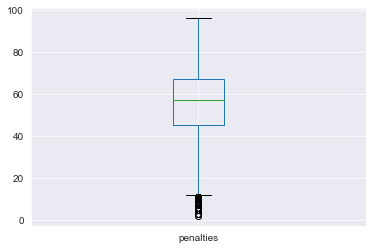

In [123]:
df_playah_att['penalties'].plot(kind='box');

So Ricky was bad but 72 other players had at least 90 penalties too

### Research Question 2 - What teams improved the most over the time period?

In [163]:
#find the max and min dates
print(df_match_fix.date.max())
print(df_match_fix.date.min())

2016-05-25 00:00:00
2008-07-18 00:00:00


In [267]:
#check first year wins
df_2008 = df_match_fix[(df_match_fix['date'] > '2008-01-01 00:00:00') & (df_match_fix['date'] < '2008-12-31 00:00:00')]

#get last year wins
df_2016 = df_match_fix[(df_match_fix['date'] > '2016-01-01 00:00:00') & (df_match_fix['date'] < '2016-12-31 00:00:00')]

#check size
len(df_2008)
len(df_2016)

#these need to be dataframes so we can correlate back
df_2008_wins = df_2008['winning_team_id'].value_counts()[:1221].sort_values(ascending=False)
df_2016_wins = df_2016['winning_team_id'].value_counts()[:1219].sort_values(ascending=False)
winner = df_2016_wins - df_2008_wins
print(winner.max())




12.0


In [230]:
# so one team improved by 12 wins over the time period, cool, which one was it?

#convert list to dataframe
df_match_totals = pd.DataFrame()
temp_2016 = list(df_2016_wins.index.values)
temp2_2016 = list(df_2016_wins)
df_match_totals["team_id"] = temp
df_match_totals["2016_wins"] = temp2
df_match_totals.head()


,team_id,2016_wins
0,9772,19
1,9885,19
2,8634,17
3,8633,17
4,9906,16


In [266]:
#loop over the totals frame and match up to the 2008 data to find the biggest change in wins
biggest_change = 0
team_id = 0
for myIndex in df_match_totals['team_id']:
    if myIndex in df_2008_wins:
        mask = df_match_totals["team_id"] == myIndex
        df_m = df_match_totals[mask]
        difference = (int (df_m["2016_wins"])) - (int (df_2008_wins[myIndex]))
        if difference > biggest_change:
            biggest_change = difference
            team_id = myIndex

#print out the results
print (biggest_change)
print (team_id)
temp = df_team[df_team["team_api_id"] == team_id]
print (temp["team_long_name"])

12
9772
216    SL Benfica
Name: team_long_name, dtype: object


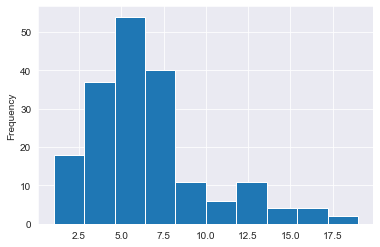

In [268]:
#is winning 12 games alot?
df_match_totals['2016_wins'].plot(kind='hist');

<a id='conclusions'></a>
## Conclusions

While Ricky was the most penalized player at 96 penalties over the time period, he was not much of an outlier.  He had company with 72 other players with over 90 penalties.  Thats alot of penalties, Ricky and those other 72 might want to stop tripping people.

The SL Benfica team improved the most over the time period with a 12 win improvement from the first year compared to the last year.  Given that the best teams win 17.5 games, winning 12 is quite the accomplishment.  


## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

## OPTIONAL: Question for the reviewer
 
If you have any question about the starter code or your own implementation, please add it in the cell below. 

For example, if you want to know why a piece of code is written the way it is, or its function, or alternative ways of implementing the same functionality, or if you want to get feedback on a specific part of your code or get feedback on things you tried but did not work.

Please keep your questions succinct and clear to help the reviewer answer them satisfactorily. 

> **_Your question_**

In [269]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1